#  Exploratory Data Analysis ENEM 2019

# 1) Loading Data

ENEM in loose translation means National Exam of High School. It is the principal way to enter a university in all Brazilian territory. This analysis is meant to discover if ethnicity, household income, age, type of school (private or public), access to internet and other aspects can be related to the final grade of the students

In [1]:
import pandas as pd
import zipfile
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [141]:
df_enem = pd.read_csv("data/enem_summarized.csv")

In [142]:
df_enem = df_enem.drop(columns=['Unnamed: 0'])
df_enem.head()

,id,geographic_state,age,gender,ethnicity,biology_grade,history_grade,portuguese_grade,tech_grade,math_grade,school_type,mothers_schooling,internet_access,household_income,presence_day1,presence_day2
0,190001595656,NaN,13,M,3,NaN,NaN,NaN,NaN,NaN,1,B,B,A,0,0
1,190001421546,NaN,8,M,1,NaN,NaN,NaN,NaN,NaN,1,E,B,C,0,0
2,190001133210,NaN,13,F,3,NaN,NaN,NaN,NaN,NaN,1,E,B,B,0,0
3,190001199383,NaN,10,F,1,483.8,503.6,537.3,392.0,460.0,1,E,B,E,1,1
4,190001237802,NaN,7,F,1,513.6,575.5,570.7,677.0,860.0,1,E,B,G,1,1


# 2) Data Type

Knowing the nature of the variables

In [143]:
print('DATASET SHAPE: ', df_enem.shape, '\n')
print('-'*50)
print('FEATURE DATA TYPES: ')
print(df_enem.info())

DATASET SHAPE:  (4656181, 16) 

--------------------------------------------------
FEATURE DATA TYPES: 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4656181 entries, 0 to 4656180
Data columns (total 16 columns):
 #   Column             Dtype  
---  ------             -----  
 0   id                 int64  
 1   geographic_state   object 
 2   age                int64  
 3   gender             object 
 4   ethnicity          int64  
 5   biology_grade      float64
 6   history_grade      float64
 7   portuguese_grade   float64
 8   tech_grade         float64
 9   math_grade         float64
 10  school_type        int64  
 11  mothers_schooling  object 
 12  internet_access    object 
 13  household_income   object 
 14  presence_day1      int64  
 15  presence_day2      int64  
dtypes: float64(5), int64(6), object(5)
memory usage: 568.4+ MB
None


In [144]:
print('NUMBER OF UNIQUE VALUES PER FEATURE:', '\n')
print(df_enem.nunique())

NUMBER OF UNIQUE VALUES PER FEATURE: 

id                   4656181
geographic_state          27
age                       20
gender                     2
ethnicity                  6
biology_grade           4684
history_grade           4682
portuguese_grade        4115
tech_grade              6005
math_grade                50
school_type                3
mothers_schooling          8
internet_access            2
household_income          17
presence_day1              3
presence_day2              3
dtype: int64


In [145]:
print('NULL VALUES PER FEATURE')
print(df_enem.isnull().sum())

NULL VALUES PER FEATURE
id                         0
geographic_state     3551426
age                        0
gender                     0
ethnicity                  0
biology_grade        1209313
history_grade        1019516
portuguese_grade     1019516
tech_grade           1209313
math_grade           1019517
school_type                0
mothers_schooling          0
internet_access            0
household_income           0
presence_day1              0
presence_day2              0
dtype: int64


In [146]:
registration = len(df_enem['id'])
print ('ENEM has received '+ str(registration) +' registrations')

ENEM has received 4656181 registrations


Assigning labels to variables

In [147]:
#Ethnicity
df_enem['ethnicity'] = df_enem['ethnicity'].map({0:'NA', 6:'NA', 1:'White', 2:'Black', 3:'Brown',4:'Yellow', 5:'Indigenous'})

#Access to internet
df_enem['internet_access'] = df_enem['internet_access'].map({'A':'No', 'B':'Yes'})

#Mother's schooling
df_enem['mothers_schooling'] = df_enem['mothers_schooling'].map({'A':'Never studied', 'B':'Did not complete elementary school', 'C':'Did not complete elementary school',
                                'D':'Did not complete high school', 'E':'Did not complete college', 'F':'graduated',
                                'G':'Post graduate','H':'Dont know'})

#Familiar income
df_enem['household_income'] = df_enem['household_income'].map({'A':'None', 'B':'Until 1.320', 'C':'Until 1.320',
                                 'D':'Until 3.520', 'E':'Until 3.520', 'F':'Until 3.520', 'G':'Until 3.520',
                                 'H':'Until 10.560','I':'Until 10.560', 'J':'Until 10.560','K':'Until 10.560',
                                 'L':'Until 10.560','M':'Until 10.560','N':'Until 10.560',
                                 'O':'More than 10.560','P':'More than 10.560','Q':'More than 10.560'})

#Type of school
df_enem['school_type'] = df_enem['school_type'].map({1:'Do not answer', 2:'Public', 3:'Private', 4:'Abroad'})

#Presence in Human Science test
df_enem['presence_day1'] = df_enem['presence_day1'].map({0:'Did not attend the test', 1:'Attend the test', 2:'Eliminated'})

#Presence in Math test
df_enem['presence_day2'] = df_enem['presence_day2'].map({0:'Did not attend the test', 1:'Attend the test', 2:'Eliminated'})

df_enem['age'] = df_enem['age'].map({1:'a) younger than 17', 
                                     2:'b) 17', 
                                     3:'c) 18',
                                     4:	'd) 19',
                                    5:	'e) 20',
                                    6:	'f) 21',
                                    7:	'g) 22',
                                    8:	'h) 23',
                                    9:	'i) 24',
                                    10:	'j) 25',
                                    11:	'k) between 26 and 30',
                                    12:	'l) between 31 and 35',
                                    13: 'm) between 36 and 40',
                                    14:	'n) between 41 and 45',
                                    15:	'o) between 46 and 50',
                                    16:	'p) between 51 and 55',
                                    17:	'q) between 56 and 60',
                                    18:	'r) between 61 and 65',
                                    19:	's) between 66 and 70',
                                    20: 't) older than 70'})

# 3) Removing candidates that do not attend to the test

In [148]:
print('Percentage of students present on the first day of ENEM')
print(round(df_enem['presence_day1'].value_counts(normalize=True)*100,2))
print('\n', 'Percentage of students present on the second day of ENEM')
print(round(df_enem['presence_day2'].value_counts(normalize=True)*100,2))

Percentage of students present on the first day of ENEM
Attend the test            78.10
Did not attend the test    21.82
Eliminated                  0.08
Name: presence_day1, dtype: float64

 Percentage of students present on the second day of ENEM
Attend the test            74.03
Did not attend the test    25.94
Eliminated                  0.04
Name: presence_day2, dtype: float64


If you do not attend to one of the test day, the candidate is eliminated. For this reason, we will remove those people from the data set

In [149]:
print("In total "+
str(len(df_enem[(df_enem['presence_day1'] == 'Did not attend the test') | 
        (df_enem['presence_day1'] == 'eliminated') | 
        (df_enem['presence_day2'] == 'Did not attend the test') | 
        (df_enem['presence_day2'] == 'eliminated')]))+ 
    " people were absent or get eliminated, that represent " +
    str(round(len(df_enem[(df_enem['presence_day1'] == 'Did not attend the test') | 
        (df_enem['presence_day1'] == 'eliminated') | 
        (df_enem['presence_day2'] == 'Did not attend the test') | 
        (df_enem['presence_day2'] == 'eliminated')])*100/len(df_enem['id']),2))
    + "% of the total cadidates registered")


In total 1214788 people were absent or get eliminated, that represent 26.09% of the total cadidates registered


In [150]:
df_enem.drop(index=df_enem[(df_enem['presence_day1'] == 'Did not attend the test') | 
                           (df_enem['presence_day1'] == 'eliminated') | 
                           (df_enem['presence_day2'] == 'Did not attend the test') | 
                           (df_enem['presence_day2'] == 'eliminated')].index, 
             inplace=True)


In [151]:
print('NULL VALUES PER FEATURE')
print(df_enem.isnull().sum())

NULL VALUES PER FEATURE
id                         0
geographic_state     2514648
age                        0
gender                     0
ethnicity                  0
biology_grade           1713
history_grade            362
portuguese_grade         362
tech_grade              1713
math_grade               363
school_type                0
mothers_schooling          0
internet_access            0
household_income           0
presence_day1              0
presence_day2              0
dtype: int64


The number of null values reduced considerably, but to not influence the analysis, I will remove all the null values related to the grade of the students

In [152]:
df_enem.dropna(subset=['biology_grade', 'history_grade', 'portuguese_grade', 'tech_grade', 'math_grade'], inplace=True)

# 4) Univariate analysis

In [153]:
def categorical_analysis (data):
    aux = data.value_counts(normalize=False).sort_values(ascending=False)
    sns.barplot(x=aux.index, y=aux.values)
    plt.show()
    print(round(data.value_counts(normalize=True).sort_values(ascending=False)*100,2))

## 4.1) Gender

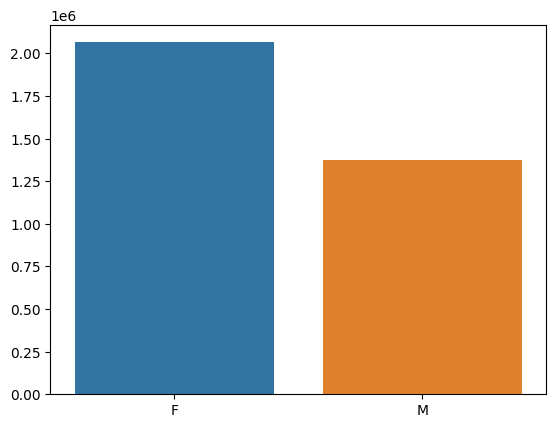

F    60.03
M    39.97
Name: gender, dtype: float64


In [155]:
categorical_analysis(df_enem['gender'])

## 4.2) State

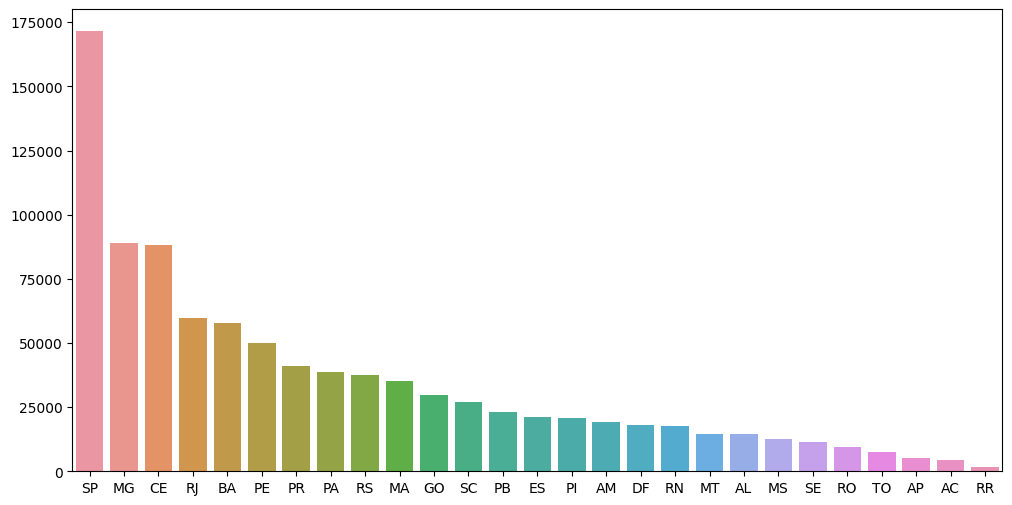

SP    18.51
MG     9.61
CE     9.51
RJ     6.47
BA     6.24
PE     5.41
PR     4.41
PA     4.17
RS     4.07
MA     3.78
GO     3.20
SC     2.93
PB     2.47
ES     2.29
PI     2.24
AM     2.08
DF     1.95
RN     1.89
MT     1.56
AL     1.56
MS     1.37
SE     1.24
RO     1.02
TO     0.81
AP     0.54
AC     0.48
RR     0.18
Name: geographic_state, dtype: float64


In [156]:
plt.figure( figsize=(12, 6))
categorical_analysis(df_enem['geographic_state'])

## 4.3) Ethnicity

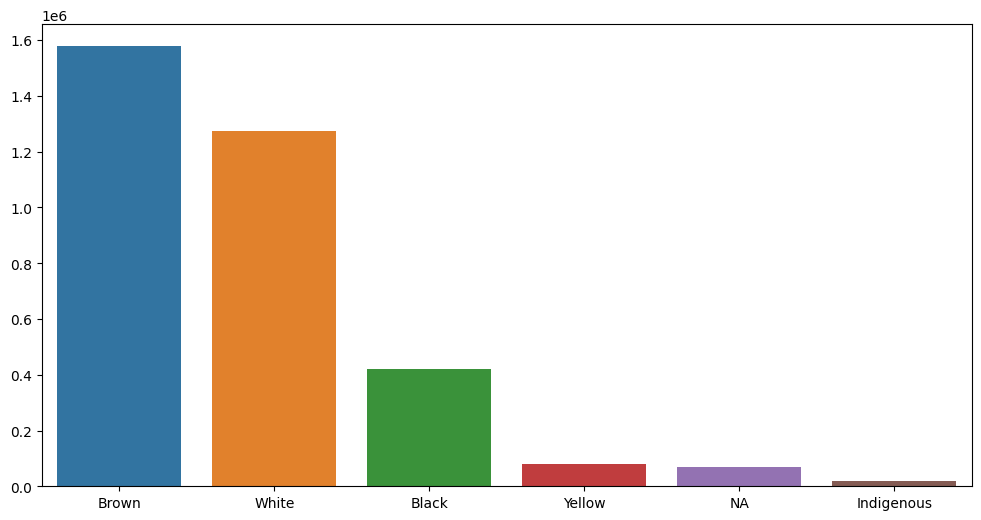

Brown         45.88
White         37.02
Black         12.25
Yellow         2.30
NA             1.97
Indigenous     0.58
Name: ethnicity, dtype: float64


In [157]:
plt.figure( figsize=(12, 6))
categorical_analysis(df_enem['ethnicity'])

## 4.4) Age

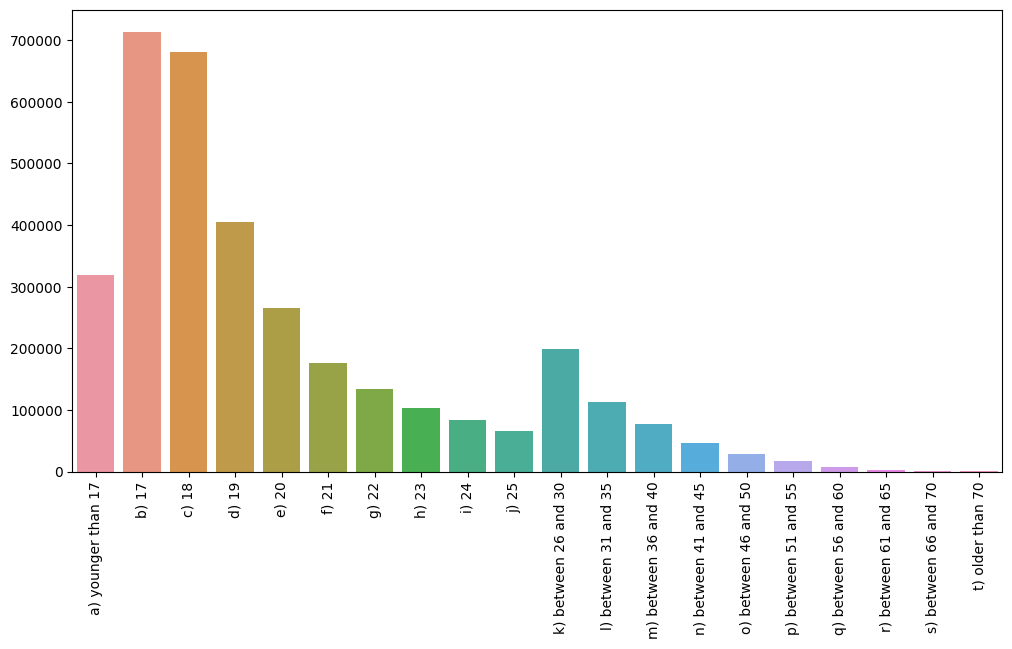

In [158]:
plt.figure( figsize=(12, 6))
plt.xticks(rotation=90)
aux = df_enem['age'].value_counts(normalize=False).sort_index(ascending=True)
sns.barplot(x=aux.index, y=aux.values)
plt.show()

## 4.5) School Type

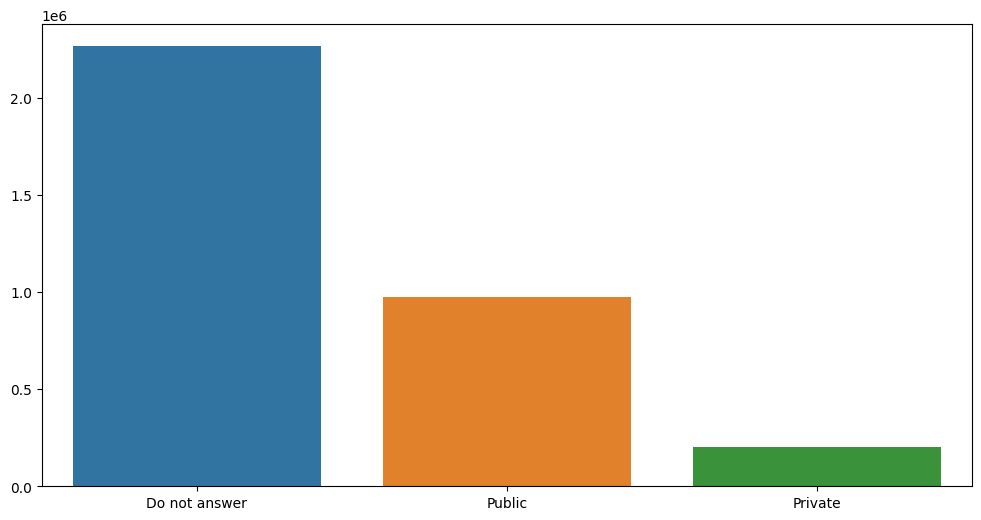

Do not answer    65.82
Public           28.31
Private           5.87
Name: school_type, dtype: float64


In [159]:
plt.figure( figsize=(12, 6))
categorical_analysis(df_enem['school_type'])

## 4.6) Internet Access

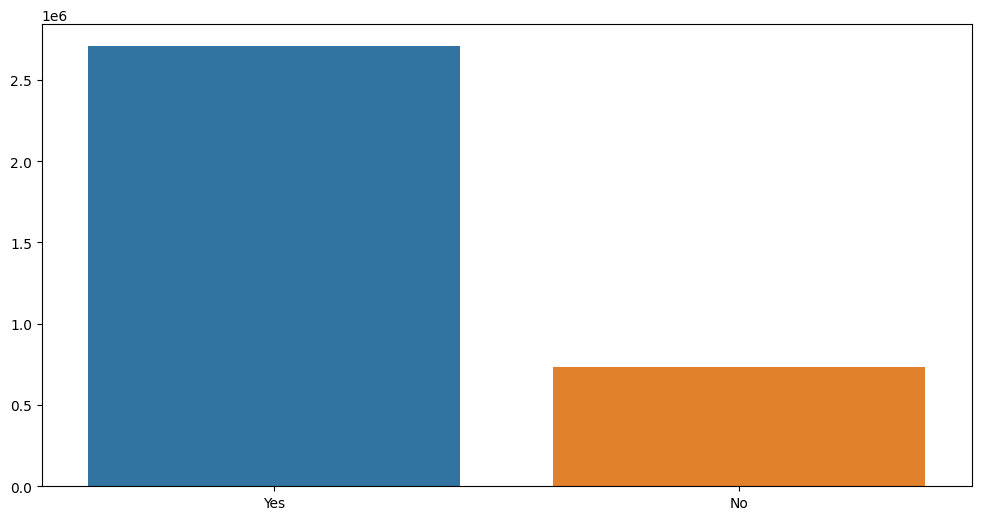

Yes    78.72
No     21.28
Name: internet_access, dtype: float64


In [160]:
plt.figure( figsize=(12, 6))
categorical_analysis(df_enem['internet_access'])

## 4.7) Mother's schooling

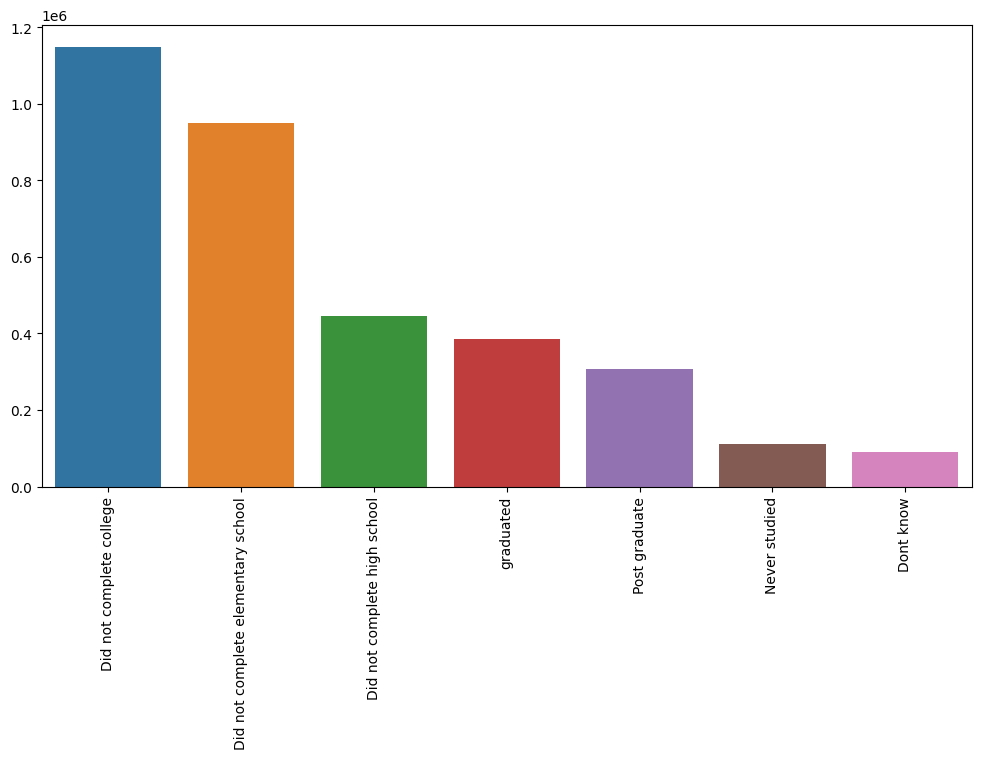

Did not complete college              33.44
Did not complete elementary school    27.60
Did not complete high school          12.92
graduated                             11.21
Post graduate                          8.97
Never studied                          3.23
Dont know                              2.63
Name: mothers_schooling, dtype: float64


In [163]:
plt.figure( figsize=(12, 6))
plt.xticks(rotation=90)
categorical_analysis(df_enem['mothers_schooling'])

## 4.8) Household Income

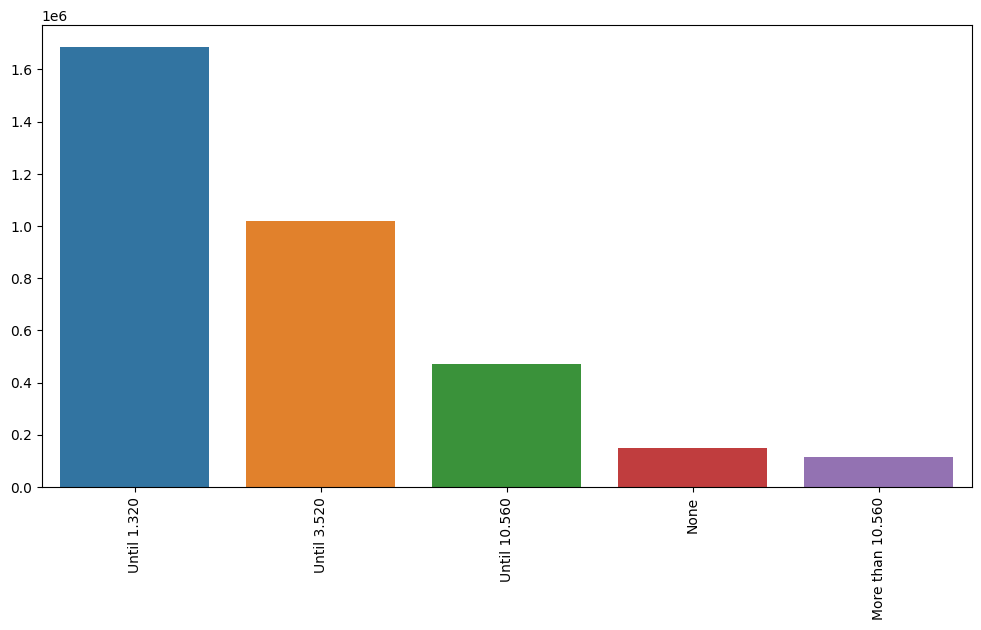

Until 1.320         49.02
Until 3.520         29.61
Until 10.560        13.65
None                 4.35
More than 10.560     3.37
Name: household_income, dtype: float64


In [164]:
plt.figure(figsize=(12, 6))
plt.xticks(rotation=90)
categorical_analysis(df_enem['household_income'])

## 4.9) The Grades

<Axes: xlabel='math_grade', ylabel='Count'>

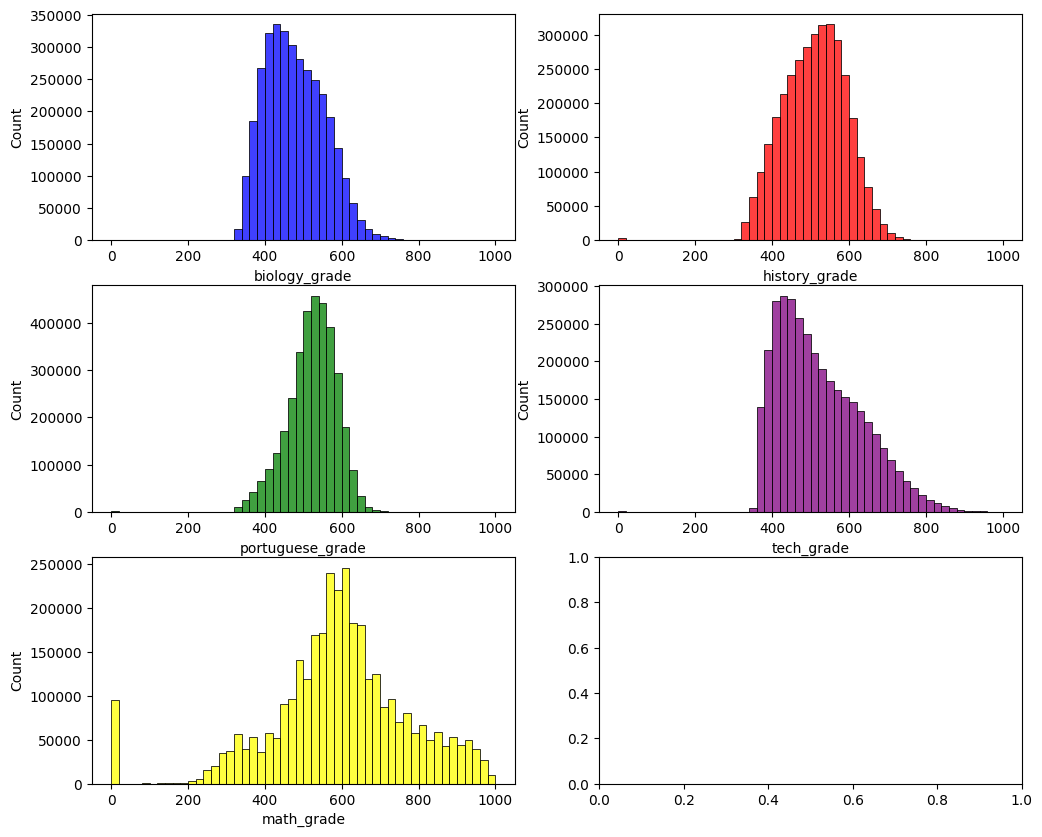

In [178]:
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(12, 10))
sns.histplot(df_enem['biology_grade'], bins=50,binrange = (0,1000),  ax=axes[0,0], color="blue")
sns.histplot(df_enem['history_grade'], bins=50,binrange = (0,1000),  ax=axes[0,1], color="red")
sns.histplot(df_enem['portuguese_grade'], bins=50,binrange = (0,1000),  ax=axes[1,0], color="green")
sns.histplot(df_enem['tech_grade'], bins=50,binrange = (0,1000),  ax=axes[1,1], color="purple")
sns.histplot(df_enem['math_grade'], bins=50,binrange = (0,1000),  ax=axes[2,0], color="yellow")


# 5) Bivariate Analysis

In [199]:
def qualitative_analysis(X, Y, data):
    plt.figure( figsize=(12, 6))
    sns.countplot(x=X, hue=Y, data=data)
    plt.show
    

In [210]:
def statistics (col1, col2, df):
    sns.boxplot(x=col1, y=col2, data=df)

    x_mean = df[[col1, col2]].groupby([col1]).mean().reset_index().sort_values(by = [col1])
    x_count = df[[col1, col2]].groupby([col1]).count().reset_index().sort_values(by = [col1]).iloc[:,1]
    x_median = df[[col1, col2]].groupby([col1]).median().reset_index().sort_values(by = [col1]).iloc[:,1]
    x_std = df[[col1, col2]].groupby([col1]).std().reset_index().sort_values(by = [col1]).iloc[:,1]
    x_min = df[[col1, col2]].groupby([col1]).min().reset_index().sort_values(by = [col1]).iloc[:,1]
    x_max = df[[col1, col2]].groupby([col1]).max().reset_index().sort_values(by = [col1]).iloc[:,1]
    x_sum = df[[col1, col2]].groupby([col1]).sum().reset_index().sort_values(by = [col1]).iloc[:,1]
    
    x_stats = pd.concat( [x_mean, x_median, x_std, x_min, x_max, x_sum, x_count], axis = 1)
    x_stats.columns = [col1,'mean', 'median', 'std', 'min', 'max', 'sum', 'count']
    return x_stats

## 5.1) Acess to Internet and Ehtnicity

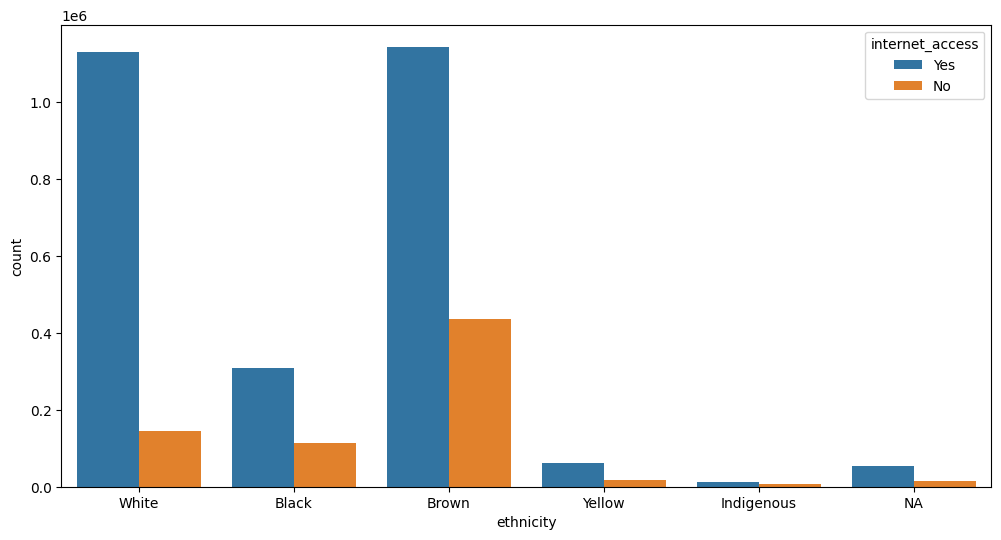

In [203]:
qualitative_analysis("ethnicity", "internet_access", df_enem)

## 5.2) Access to Internet & Type of School

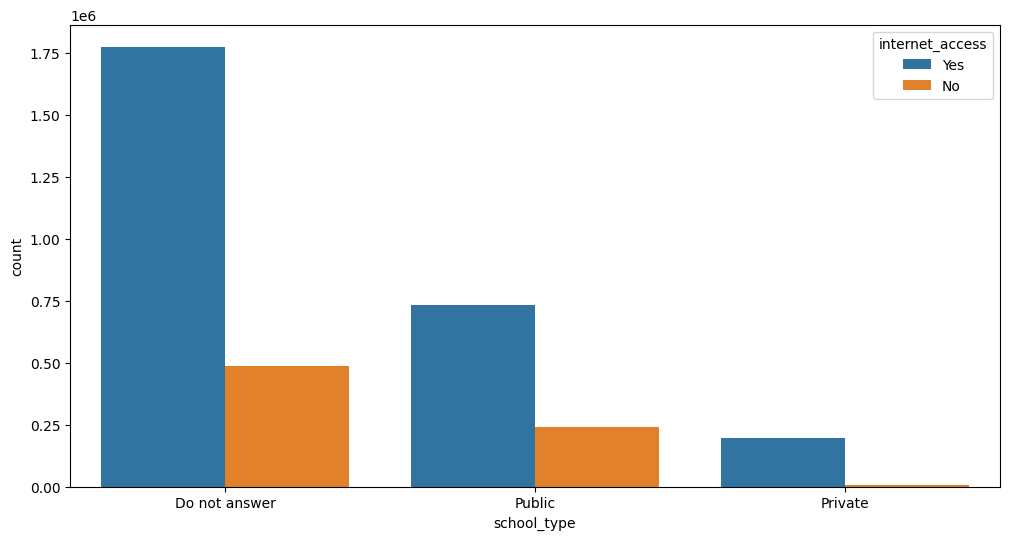

In [204]:
qualitative_analysis("school_type", "internet_access", df_enem)

## 5.3) Access to Internet & Household Income

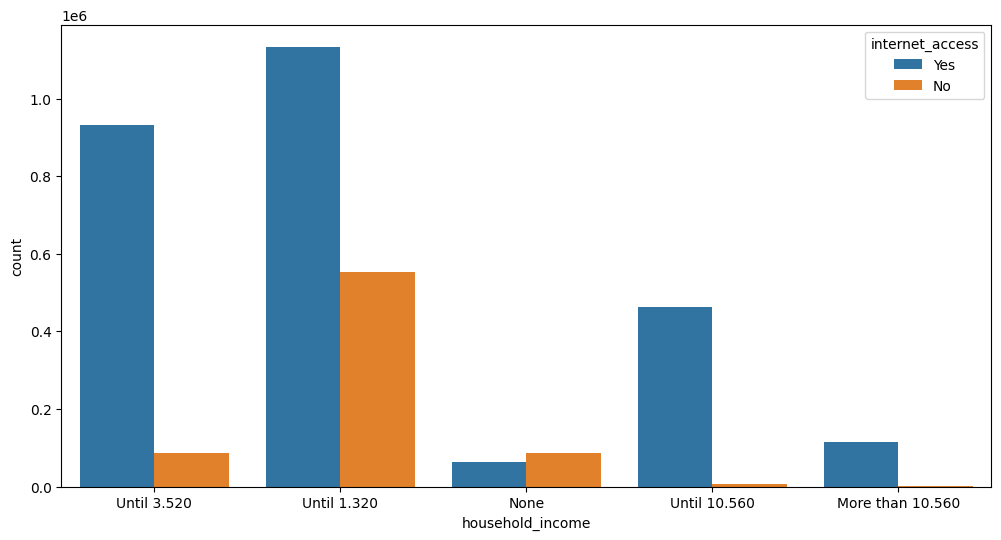

In [206]:
qualitative_analysis("household_income", "internet_access", df_enem)

## 5.4) Mothers Schooling and Household Income

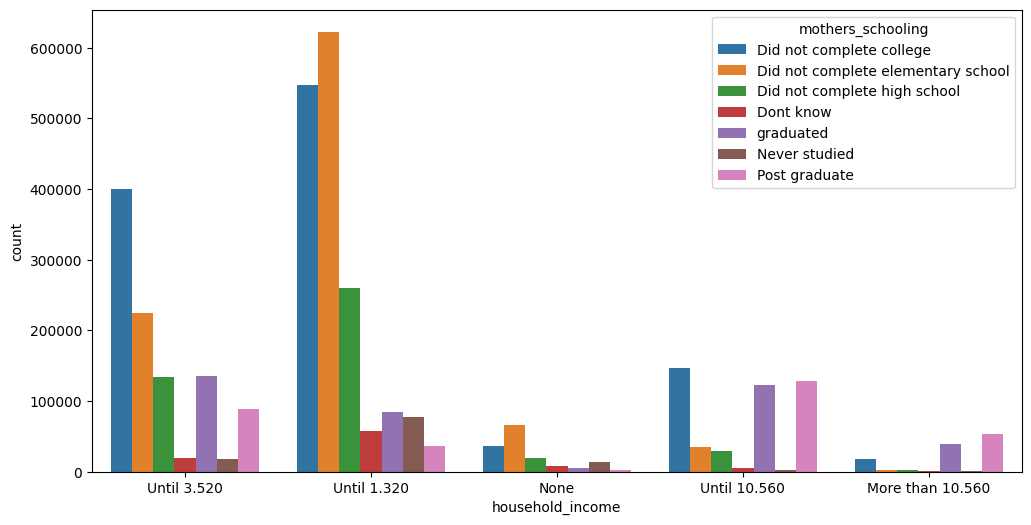

In [207]:
qualitative_analysis("household_income", "mothers_schooling", df_enem)

## 5.5) Geographic State and Household Income

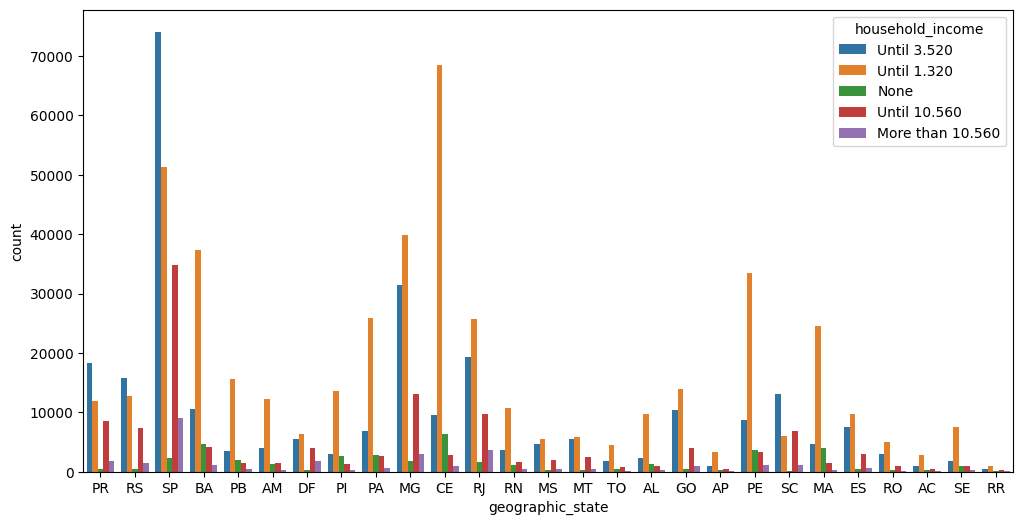

In [208]:
qualitative_analysis("geographic_state", "household_income", df_enem)

## 5.6) Type of School and Household Income

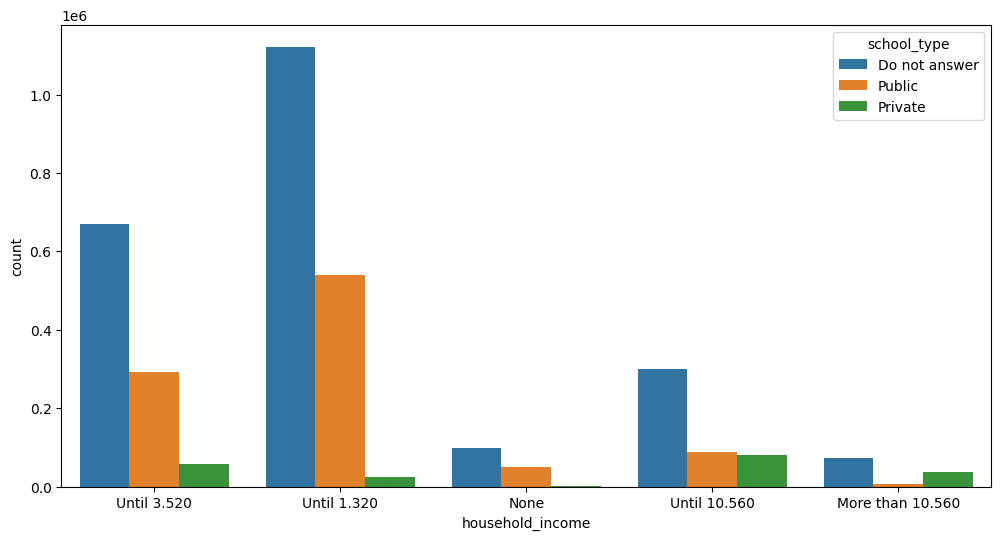

In [209]:
qualitative_analysis("household_income", "school_type", df_enem)

## 5.7) Ethnicity and Math Grade

,ethnicity,mean,median,std,min,max,sum,count
0,Black,553.293048,560.0,174.796360,0.0,1000.0,233117300.0,421327
1,Brown,562.598587,580.0,181.885578,0.0,1000.0,887678740.0,1577819
2,Indigenous,502.132305,540.0,189.215550,0.0,980.0,10027080.0,19969
3,NA,579.346423,580.0,195.880460,0.0,1000.0,39304020.0,67842
4,White,620.243556,620.0,179.609289,0.0,1000.0,789706500.0,1273220
5,Yellow,580.089710,580.0,182.377746,0.0,1000.0,45910620.0,79144


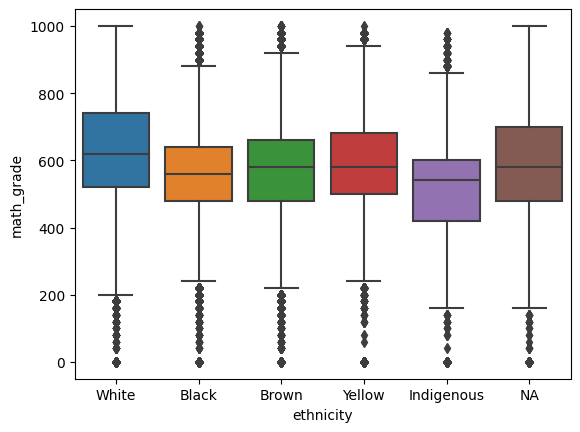

In [212]:
statistics ("ethnicity", "math_grade", df_enem)

## 5.8) Household Income and Math Grade

,household_income,mean,median,std,min,max,sum,count
0,More than 10.560,742.871276,760.0,154.715229,0.0,1000.0,86051980.0,115837
1,None,503.803197,520.0,182.221141,0.0,1000.0,75302960.0,149469
2,Until 1.320,540.469176,560.0,176.101795,0.0,1000.0,911265620.0,1686064
3,Until 10.560,682.625149,680.0,167.922944,0.0,1000.0,320573740.0,469619
4,Until 3.520,601.522843,600.0,171.057571,0.0,1000.0,612549960.0,1018332


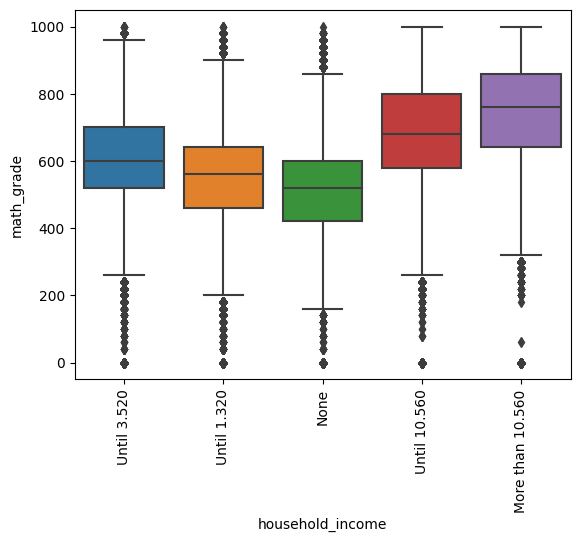

In [216]:
plt.xticks(rotation=90)
statistics ("household_income", "math_grade", df_enem)

## 5.9) Mothers Schooling and Math Grade

,mothers_schooling,mean,median,std,min,max,sum,count
0,Did not complete college,594.538283,600.0,174.997786,0.0,1000.0,683732700.0,1150023
1,Did not complete elementary school,534.478700,560.0,173.322657,0.0,1000.0,507313820.0,949175
2,Did not complete high school,561.564499,580.0,174.703104,0.0,1000.0,249586780.0,444449
3,Dont know,507.346776,540.0,192.760647,0.0,980.0,45917420.0,90505
4,Never studied,485.134783,520.0,181.059220,0.0,1000.0,53936800.0,111179
5,Post graduate,682.215739,680.0,174.686338,0.0,1000.0,210440360.0,308466
6,graduated,660.961133,660.0,174.573509,0.0,1000.0,254816380.0,385524


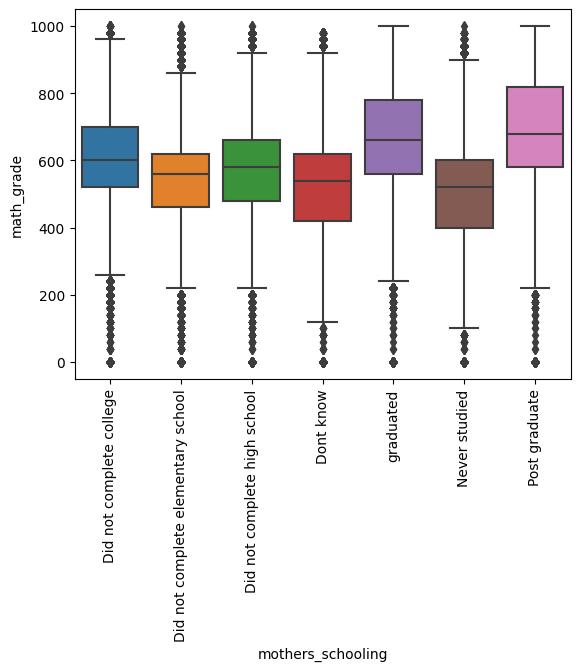

In [215]:
plt.xticks(rotation=90)
statistics ("mothers_schooling", "math_grade", df_enem)

## 5.10) Geographic State and Math Grade

,geographic_state,mean,median,std,min,max,sum,count
0,AC,573.304545,580.0,182.484652,0.0,980.0,2522540.0,4400
1,AL,565.735478,580.0,202.867254,0.0,980.0,8161300.0,14426
2,AM,523.980925,540.0,186.092230,0.0,980.0,10108640.0,19292
3,AP,552.329534,560.0,188.086023,0.0,980.0,2762200.0,5001
4,BA,571.850120,580.0,189.751152,0.0,980.0,33026060.0,57753
5,CE,535.555429,560.0,228.587862,0.0,1000.0,47155120.0,88049
6,DF,615.859781,620.0,162.581943,0.0,980.0,11138440.0,18086
7,ES,614.342180,620.0,186.879059,0.0,980.0,13056000.0,21252
8,GO,606.264296,600.0,187.307656,0.0,1000.0,17970280.0,29641
9,MA,537.181507,560.0,192.406731,0.0,980.0,18822840.0,35040


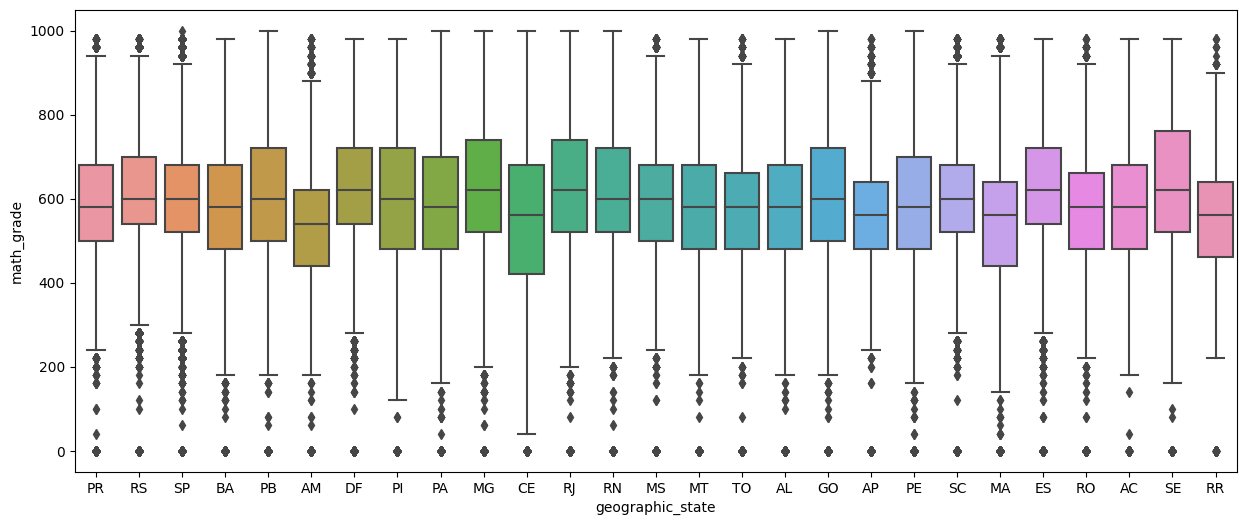

In [218]:
plt.figure(figsize=(15, 6))
statistics ("geographic_state", "math_grade", df_enem)

## 5.11) Internet Access and Math Grade

,school_type,mean,median,std,min,max,sum,count
0,Do not answer,581.414122,580.0,179.180019,0.0,1000.0,1.316144e+09,2263694
1,Private,727.805765,740.0,155.594585,0.0,1000.0,1.469287e+08,201879
2,Public,557.302197,580.0,182.903191,0.0,1000.0,5.426719e+08,973748


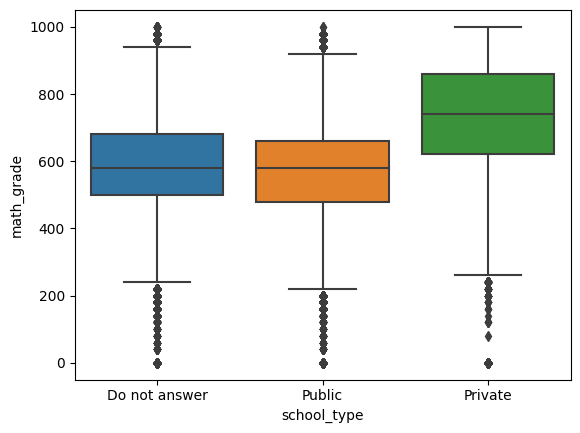

In [223]:
statistics ("school_type", "math_grade", df_enem)

# 6) The outliers: best math scores

In [232]:
best_grade = df_enem[df_enem['math_grade']>df_enem['math_grade'].mean()+df_enem['math_grade'].std()]
worst_grade = df_enem[df_enem['math_grade']>df_enem['math_grade'].mean()-df_enem['math_grade'].std()]

In [234]:
print(str(len(best_grade)) + ' students achieve grade over than '+str(round(df_enem['math_grade'].mean()+df_enem['math_grade'].std(),2)) +' points')
print(str(len(worst_grade)) + ' students achieve grade lower than '+str(round(df_enem['math_grade'].mean()-df_enem['math_grade'].std(),2)) +' points')


496910 students achieve grade over than 766.05 points
2982149 students achieve grade lower than 400.31 points


## 6.1) Ethnicity

BEST GRADES


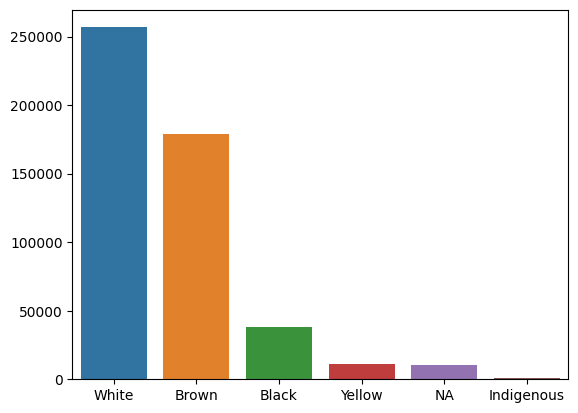

White         51.67
Brown         36.01
Black          7.74
Yellow         2.24
NA             2.12
Indigenous     0.22
Name: ethnicity, dtype: float64


In [236]:
print("BEST GRADES")
categorical_analysis(best_grade['ethnicity'])

WORST GRADES


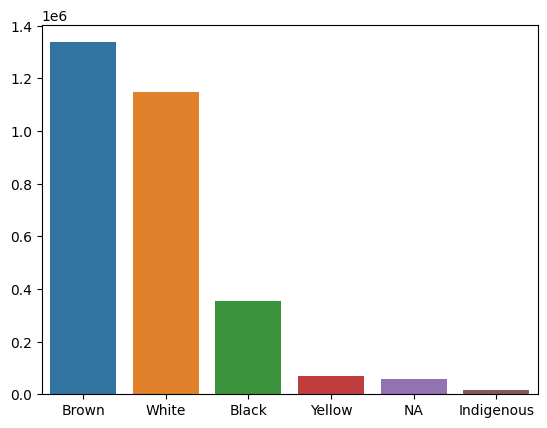

Brown         44.84
White         38.51
Black         11.92
Yellow         2.29
NA             1.93
Indigenous     0.51
Name: ethnicity, dtype: float64


In [238]:
print("WORST GRADES")
categorical_analysis(worst_grade['ethnicity'])

## 6.2) Gender

BEST GRADES


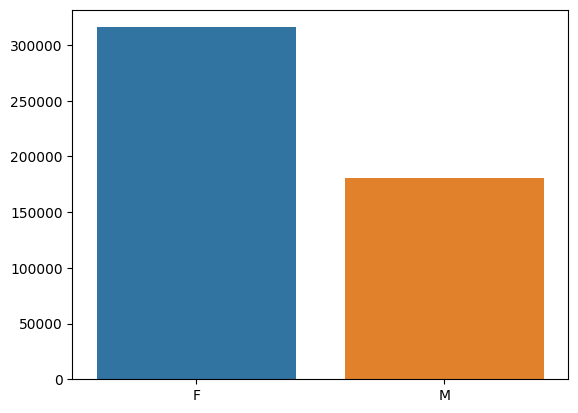

F    63.58
M    36.42
Name: gender, dtype: float64


In [239]:
print("BEST GRADES")
categorical_analysis(best_grade['gender'])

WORST GRADES


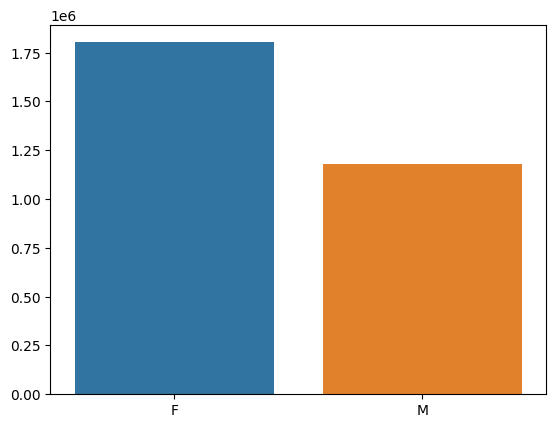

F    60.44
M    39.56
Name: gender, dtype: float64


In [240]:
print("WORST GRADES")
categorical_analysis(worst_grade['gender'])

## 6.3) Household Income

BEST GRADES


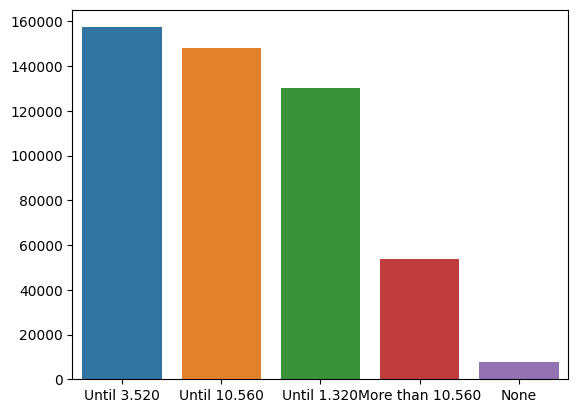

Until 3.520         31.66
Until 10.560        29.76
Until 1.320         26.23
More than 10.560    10.83
None                 1.52
Name: household_income, dtype: float64


In [241]:
print("BEST GRADES")
categorical_analysis(best_grade['household_income'])

WORST GRADES


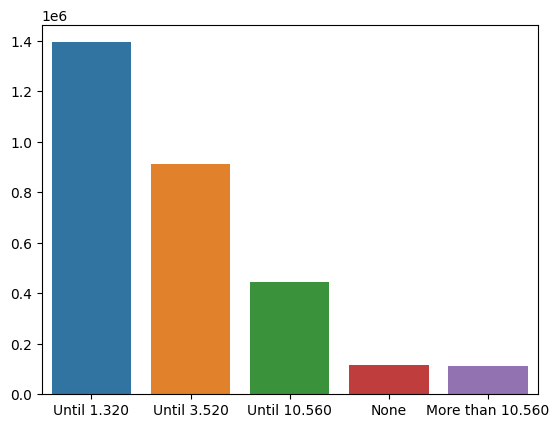

Until 1.320         46.77
Until 3.520         30.61
Until 10.560        14.97
None                 3.86
More than 10.560     3.79
Name: household_income, dtype: float64


In [242]:
print("WORST GRADES")
categorical_analysis(worst_grade['household_income'])

## 6.4) Internet Access

BEST GRADES


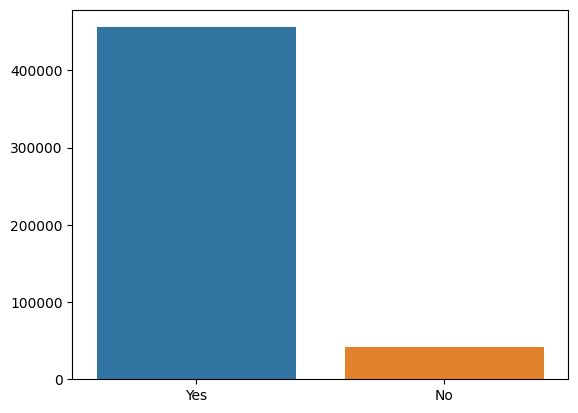

Yes    91.7
No      8.3
Name: internet_access, dtype: float64


In [243]:
print("BEST GRADES")
categorical_analysis(best_grade['internet_access'])

WORST GRADES


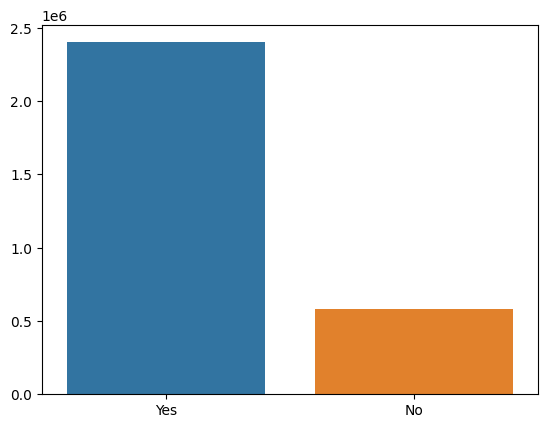

Yes    80.47
No     19.53
Name: internet_access, dtype: float64


In [244]:
print("WORST GRADES")
categorical_analysis(worst_grade['internet_access'])